In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:11<00:00, 164MB/s]
100% 1.06G/1.06G [00:11<00:00, 99.2MB/s]


In [4]:
import zipfile
zip_r = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_r.extractall('/content')
zip_r.close()

In [23]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [21]:
dir = '/content/train'
categories = ['cats','dogs']
data = []
for category in categories:
  path = os.path.join(dir,category)
  label = categories.index(category)
  for img in os.listdir(path):
    imgpath = os.path.join(path,img)
    try:
      pet_img = cv2.imread(imgpath,0)
      pet_img = cv2.resize(pet_img,(50,50))
      image = np.array(pet_img).flatten()

      data.append([image,label])
    except Exception as e:
      pass



In [24]:
print(len(data))

20000


In [25]:
dir = '/content/test'
categories = ['cats','dogs']
data1 = []
for category in categories:
  path = os.path.join(dir,category)
  label = categories.index(category)
  for img in os.listdir(path):
    imgpath = os.path.join(path,img)
    try:
      pet_img = cv2.imread(imgpath,0)
      pet_img = cv2.resize(pet_img,(50,50))
      image = np.array(pet_img).flatten()

      data1.append([image,label])
    except Exception as e:
      pass

In [26]:
print(len(data1))

5000


In [14]:
p_i = open('data1.pickle','wb')
pickle.dump(data,p_i)
p_i.close()

In [17]:
p_i = open('data1.pickle','rb')
d = pickle.load(p_i)
p_i.close()

In [27]:
p_i1 = open('data2.pickle','wb')
pickle.dump(data1,p_i1)
p_i1.close()

In [28]:
p_i1 = open('data2.pickle','rb')
d1 = pickle.load(p_i1)
p_i1.close()

In [19]:
random.shuffle(d)
features = []
labels = []

for fea,lab in d:
  features.append(fea)
  labels.append(lab)

In [29]:
random.shuffle(d1)
features1 = []
labels1 = []
for fea,lab in d1:
  features1.append(fea)
  labels1.append(lab)

In [30]:
x_train,y_train,x_test,y_test = features,labels,features1,labels1

In [31]:
model = SVC(C=1,kernel='poly',gamma='auto')
model.fit(x_train,y_train)


SVC(C=1, gamma='auto', kernel='poly')

In [32]:
y_pred = model.predict(x_test)
acc = model.score(x_test,y_test)
categories = ['cats','dogs']
print('accuracy : ',acc)
print('Prediction : ',categories[y_pred[0]])

accuracy :  1.0
Prediction :  cats


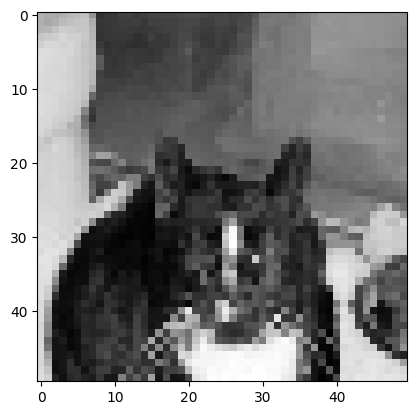

In [33]:
mypet = x_test[0].reshape(50,50)
plt.imshow(mypet,cmap = 'gray')
plt.show()